In [23]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.vq import kmeans2
from matplotlib import pyplot as plt
import pandas as pd

In [24]:
data_ds = pd.read_csv('moons.csv')
data_ds.columns = ['x', 'y']
data_ds.head()

,x,y
0,-0.378142,0.940750
1,0.933566,0.153805
2,2.048309,0.498172
3,0.947891,0.162473
4,2.000739,0.183700


In [25]:
#compute the distance matrix
matrix_ward = linkage(data_ds, method='ward',metric='euclidean')
matrix_single = linkage(data_ds, method='single',metric='euclidean')

In [26]:
# obtan cluster labels
labels_ward = fcluster(matrix_ward,2, criterion='maxclust')
labels_single = fcluster(matrix_single,2, criterion='maxclust')
centroids_kmeans,labels_kmeans = kmeans2(data_ds, 2, minit='points')

In [27]:
data_ds['labels_kmeans'] = labels_kmeans
data_ds['labels_ward'] = labels_ward
data_ds['labels_single'] = labels_single

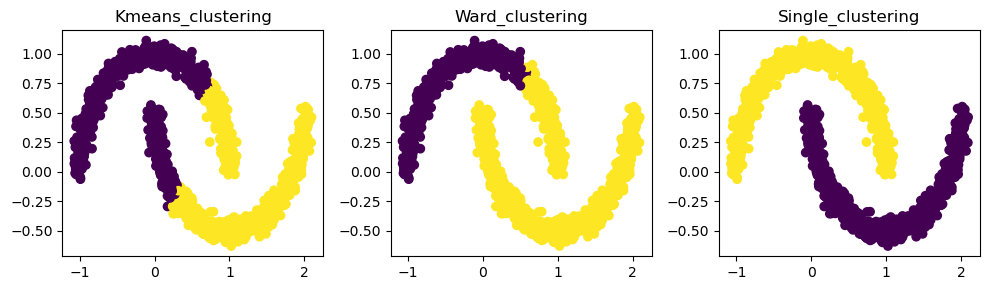

In [28]:
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].scatter(data_ds['x'],data_ds['y'],c=data_ds['labels_kmeans'])
ax[0].title.set_text('Kmeans_clustering')

ax[1].scatter(data_ds['x'],data_ds['y'],c=data_ds['labels_ward'])
ax[1].title.set_text('Ward_clustering')

ax[2].scatter(data_ds['x'],data_ds['y'],c=data_ds['labels_single'])
ax[2].title.set_text('Single_clustering')

fig.tight_layout()

plt.show()